1 - Entedimento do Negócio

Introdução:

  Roof Imóveis é uma empresa do ramo imobiliário brasileiro e quer expandir sua área de atuação fazendo um investimento internacional. 

  A empresa irá investir em imóveis no Condado de King County nos Estados Unidos. Fundado em 1852, é um dos 39 condados do estado de Washington, a sede e cidade mais populosa é Seattle.

  Com mais de 2,2 milhões de habitantes, é o condado mais populoso do estado e o 12° mais populoso do país.

  Fui contratada como consultora estratégica para analisar quais seriam os 5 imóveis que a empresa deve investir e o porquê e quais 5 imóveis não recomendo o investimento.

2 - Entedimento dos Dados

O dataset apresenta a venda de imóveis e suas características na região de Maio de 2014 a Maio de 2015, tem um total de 21613 registros com 21 atributos.

In [ ]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures


In [ ]:
ds = pd.read_csv('kc_house_data.csv')
ds.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


3 - Preparação dos Dados

In [ ]:
ds.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
ds['date'] = pd.to_datetime(ds['date'])
ds.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [ ]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


4 - Modelagem dos Dados

In [ ]:
#Verificando a média de preço de imóveis por zipcode

media_por_zipcode = ds[['zipcode', 'price']].groupby('zipcode').mean().reset_index()
ds = ds.merge(media_por_zipcode, on='zipcode', suffixes=('', '_zipcode_mean'))
ds

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_zipcode_mean
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,3.106128e+05
1,4060000240,2014-06-23,205425.0,2,1.00,880,6780,1.0,0,0,...,880,0,1945,0,98178,47.5009,-122.248,1190,6780,3.106128e+05
2,4058801670,2014-07-17,445000.0,3,2.25,2100,8201,1.0,0,2,...,1620,480,1967,0,98178,47.5091,-122.244,2660,8712,3.106128e+05
3,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,1.0,0,0,...,1300,0,1961,0,98178,47.5053,-122.255,1320,7619,3.106128e+05
4,6874200960,2015-02-27,170000.0,2,1.00,860,5265,1.0,0,0,...,860,0,1931,0,98178,47.5048,-122.272,1650,8775,3.106128e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2525049086,2014-10-03,2720000.0,4,3.25,3990,18115,2.0,0,0,...,3990,0,1989,0,98039,47.6177,-122.229,3450,16087,2.160607e+06
21609,2525049113,2014-07-25,1950000.0,4,3.50,4065,18713,2.0,0,0,...,4065,0,1987,0,98039,47.6209,-122.237,3070,18713,2.160607e+06
21610,3262300485,2015-04-21,2250000.0,5,5.25,3410,8118,2.0,0,0,...,3410,0,2006,0,98039,47.6295,-122.236,3410,16236,2.160607e+06
21611,6447300365,2014-11-13,2900000.0,5,4.00,5190,14600,2.0,0,1,...,5190,0,2013,0,98039,47.6102,-122.225,3840,19250,2.160607e+06


In [ ]:
ds[['zipcode','price_zipcode_mean']]

,zipcode,price_zipcode_mean
0,98178,3.106128e+05
1,98178,3.106128e+05
2,98178,3.106128e+05
3,98178,3.106128e+05
4,98178,3.106128e+05
...,...,...
21608,98039,2.160607e+06
21609,98039,2.160607e+06
21610,98039,2.160607e+06
21611,98039,2.160607e+06


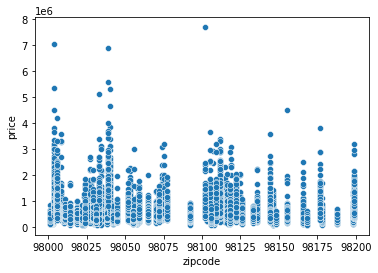

In [ ]:
sns.scatterplot(data=ds, x='zipcode', y='price')

Para validar a hipótese de calcular o preço por metro quadrado de cada imóvel é realizado um overview a partir do gráfico a seguir de como o preço se comporta pelo metro quadrado de área habitável. 

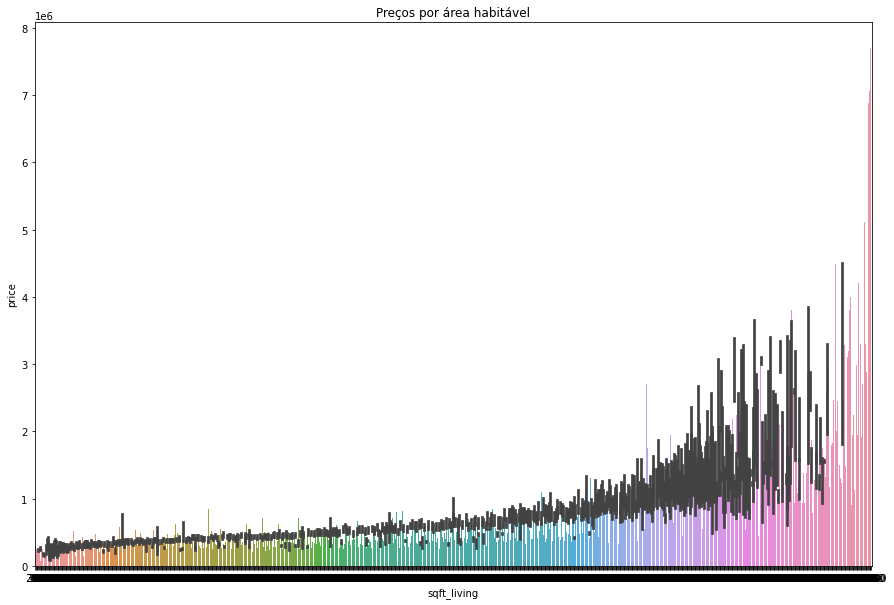

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("Preços por área habitável")
plt.xlabel('Área')
plt.ylabel('Preço')
sns.barplot(x='sqft_living',y='price',data=ds);

é possível perceber que há uma relação válida pelo gráfico. Portanto, será adicionada uma nova coluna relacionando esses dois itens estimando o preço a partir da regressão linear.

In [ ]:
model = LinearRegression()
model.fit(ds[['sqft_living']], ds[['price']])
predictions = model.predict(ds[['sqft_living']])
ds['linear_price'] = predictions
ds

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_zipcode_mean,linear_price
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,3.106128e+05,2.875551e+05
1,4060000240,2014-06-23,205425.0,2,1.00,880,6780,1.0,0,0,...,0,1945,0,98178,47.5009,-122.248,1190,6780,3.106128e+05,2.033680e+05
2,4058801670,2014-07-17,445000.0,3,2.25,2100,8201,1.0,0,2,...,480,1967,0,98178,47.5091,-122.244,2660,8712,3.106128e+05,5.457287e+05
3,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,1.0,0,0,...,0,1961,0,98178,47.5053,-122.255,1320,7619,3.106128e+05,3.212299e+05
4,6874200960,2015-02-27,170000.0,2,1.00,860,5265,1.0,0,0,...,0,1931,0,98178,47.5048,-122.272,1650,8775,3.106128e+05,1.977555e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2525049086,2014-10-03,2720000.0,4,3.25,3990,18115,2.0,0,0,...,0,1989,0,98039,47.6177,-122.229,3450,16087,2.160607e+06,1.076107e+06
21609,2525049113,2014-07-25,1950000.0,4,3.50,4065,18713,2.0,0,0,...,0,1987,0,98039,47.6209,-122.237,3070,18713,2.160607e+06,1.097154e+06
21610,3262300485,2015-04-21,2250000.0,5,5.25,3410,8118,2.0,0,0,...,0,2006,0,98039,47.6295,-122.236,3410,16236,2.160607e+06,9.133456e+05
21611,6447300365,2014-11-13,2900000.0,5,4.00,5190,14600,2.0,0,1,...,0,2013,0,98039,47.6102,-122.225,3840,19250,2.160607e+06,1.412856e+06


Também pode ser analisada a média de preço dos imóveis pela condição em que se encontram.

In [ ]:
media_por_condicao = ds[['condition', 'price']].groupby('condition').mean().reset_index()
ds = ds.merge(media_por_condicao, on='condition', suffixes=('', '_condition_mean'))
ds

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_zipcode_mean,linear_price,price_condition_mean
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,310612.755725,287555.067025,542012.578148
1,4058801670,2014-07-17,445000.0,3,2.25,2100,8201,1.0,0,2,...,1967,0,98178,47.5091,-122.244,2660,8712,310612.755725,545728.749490,542012.578148
2,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,1.0,0,0,...,1961,0,98178,47.5053,-122.255,1320,7619,310612.755725,321229.895172,542012.578148
3,6874200960,2015-02-27,170000.0,2,1.00,860,5265,1.0,0,0,...,1931,0,98178,47.5048,-122.272,1650,8775,310612.755725,197755.525297,542012.578148
4,4268200055,2015-05-01,245000.0,3,1.75,1740,11547,1.0,0,0,...,1954,0,98178,47.4945,-122.220,880,78408,310612.755725,444704.265047,542012.578148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3886902445,2015-03-16,535000.0,2,1.00,920,9000,1.0,0,0,...,1954,0,98033,47.6831,-122.189,1760,8400,803719.523148,214592.939371,334431.666667
21609,4022900951,2015-04-02,305000.0,2,1.00,910,22725,1.0,0,0,...,1926,0,98155,47.7712,-122.299,2000,14566,423725.695067,211786.703692,334431.666667
21610,3980300371,2014-09-26,142000.0,0,0.00,290,20875,1.0,0,0,...,1963,0,98024,47.5308,-121.888,1620,22850,580526.790123,37800.091596,334431.666667
21611,1726059053,2014-09-16,270000.0,2,1.50,1380,209959,1.0,0,0,...,1954,0,98011,47.7461,-122.195,3130,19868,490351.466667,343679.780604,334431.666667


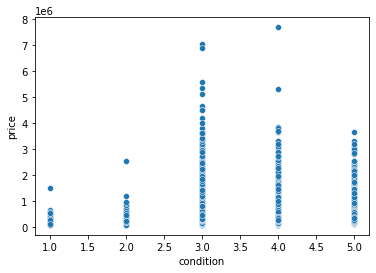

In [ ]:
sns.scatterplot(data=ds, x='condition', y='price')

E, pela qualidade da vista.

In [ ]:
media_por_vista = ds[['view', 'price']].groupby('view').mean().reset_index()
ds = ds.merge(media_por_vista, on='view', suffixes=('', '_view_mean'))
ds

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_zipcode_mean,linear_price,price_condition_mean,price_view_mean
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,3.106128e+05,287555.067025,542012.578148,496564.192108
1,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,1.0,0,0,...,0,98178,47.5053,-122.255,1320,7619,3.106128e+05,321229.895172,542012.578148,496564.192108
2,6874200960,2015-02-27,170000.0,2,1.00,860,5265,1.0,0,0,...,0,98178,47.5048,-122.272,1650,8775,3.106128e+05,197755.525297,542012.578148,496564.192108
3,4268200055,2015-05-01,245000.0,3,1.75,1740,11547,1.0,0,0,...,0,98178,47.4945,-122.220,880,78408,3.106128e+05,444704.265047,542012.578148,496564.192108
4,3969300030,2014-07-23,165000.0,4,1.00,1000,7134,1.0,0,0,...,0,98178,47.4897,-122.240,1020,7138,3.106128e+05,237042.824803,542012.578148,496564.192108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3756100160,2014-09-23,678000.0,3,2.75,2770,10000,1.0,0,1,...,0,98033,47.7011,-122.206,2450,10000,8.037195e+05,733746.539981,612418.089359,812280.837349
21609,3886902950,2014-09-11,860000.0,4,3.50,3380,8098,1.0,0,1,...,0,98033,47.6839,-122.190,1890,8400,8.037195e+05,904926.916399,612418.089359,812280.837349
21610,6744700343,2014-12-09,480000.0,5,3.00,2240,15435,1.0,0,1,...,0,98155,47.7426,-122.288,2240,10750,4.237257e+05,585016.048996,612418.089359,812280.837349
21611,3623500135,2015-03-26,800000.0,4,2.25,2350,10664,1.0,0,1,...,0,98040,47.5743,-122.238,2350,10140,1.194230e+06,615884.641465,327287.145349,812280.837349


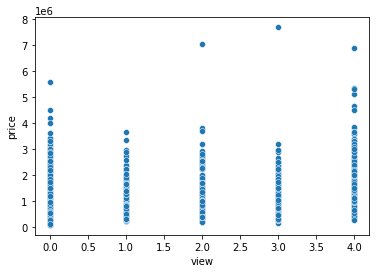

In [ ]:
sns.scatterplot(data=ds, x='view', y='price')

é possível também analisar o preço a partir do número de quartos do imóvel

In [ ]:
ds['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


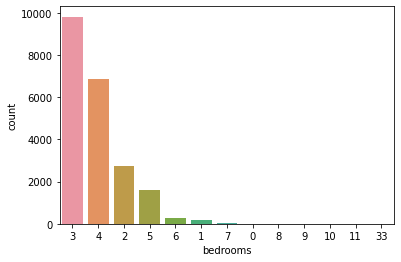

In [ ]:
sns.countplot(ds.bedrooms,order=ds['bedrooms'].value_counts().index);

In [ ]:
model = LinearRegression()
model.fit(ds[['bedrooms']], ds[['price']])
predictions = model.predict(ds[['bedrooms']])
ds['linear_price_bed'] = predictions
ds

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_zipcode_mean,linear_price,price_condition_mean,price_view_mean,linear_price_bed
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,3.106128e+05,287555.067025,542012.578148,496564.192108,494950.735854
1,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,1.0,0,0,...,98178,47.5053,-122.255,1320,7619,3.106128e+05,321229.895172,542012.578148,496564.192108,494950.735854
2,6874200960,2015-02-27,170000.0,2,1.00,860,5265,1.0,0,0,...,98178,47.5048,-122.272,1650,8775,3.106128e+05,197755.525297,542012.578148,496564.192108,373234.609342
3,4268200055,2015-05-01,245000.0,3,1.75,1740,11547,1.0,0,0,...,98178,47.4945,-122.220,880,78408,3.106128e+05,444704.265047,542012.578148,496564.192108,494950.735854
4,3969300030,2014-07-23,165000.0,4,1.00,1000,7134,1.0,0,0,...,98178,47.4897,-122.240,1020,7138,3.106128e+05,237042.824803,542012.578148,496564.192108,616666.862366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3756100160,2014-09-23,678000.0,3,2.75,2770,10000,1.0,0,1,...,98033,47.7011,-122.206,2450,10000,8.037195e+05,733746.539981,612418.089359,812280.837349,494950.735854
21609,3886902950,2014-09-11,860000.0,4,3.50,3380,8098,1.0,0,1,...,98033,47.6839,-122.190,1890,8400,8.037195e+05,904926.916399,612418.089359,812280.837349,616666.862366
21610,6744700343,2014-12-09,480000.0,5,3.00,2240,15435,1.0,0,1,...,98155,47.7426,-122.288,2240,10750,4.237257e+05,585016.048996,612418.089359,812280.837349,738382.988877
21611,3623500135,2015-03-26,800000.0,4,2.25,2350,10664,1.0,0,1,...,98040,47.5743,-122.238,2350,10140,1.194230e+06,615884.641465,327287.145349,812280.837349,616666.862366


5 - Avaliação do Modelo

A análise da compra do imóvel irá consistir em:


*   Condição em que o imóvel se encontra
*   Preço por região
*   Preço por área habitável
*   Qualidade da vista
*   Preço por quarto







Analisando os imóveis que deveriam ser comprados, temos as condições de estar em boas condiçoes (4 ou 5), o preço ser menor que a média de preço da região, o preço por área habitável tem que estar abaixo da média, o preço baixo por uma vista melhor e o preço por quarto abaixo da média.

In [ ]:
ds['imovel_investimento'] = 0

for i in range(len(ds)):
  if(ds.loc[i, 'price'] < ds.loc[i, 'price_zipcode_mean']) & (ds.loc[i, 'price'] < ds.loc[i, 'linear_price']) & (ds.loc[i, 'condition'] >= 4) & (ds.loc[i, 'price'] < ds.loc[i, 'price_view_mean']) & (ds.loc[i, 'view'] >= 2) & (ds.loc[i, 'price'] < ds.loc[i, 'linear_price_bed']):
    ds.loc[i, 'imovel_investimento'] = 1


ds['imovel_investimento'].value_counts()[1]

47

Foram encontrados 47 imóveis com as condições apropriados para compra. Podemos pegar os de menores preços para termos um investimento inicial:

In [ ]:
imovel_compra = ds[ds['imovel_investimento'] == 1]
imovel_compra.sort_values(['price'], axis=0, ascending=[True], inplace=True)

imovel_compra.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,price_zipcode_mean,linear_price,price_condition_mean,price_view_mean,linear_price_bed,imovel_investimento,imovel_nao_investimento
20441,2372800050,2014-05-21,220000.0,3,1.0,1060,9126,1.0,0,2,...,-121.999,1300,9126,315709.303419,253880.238877,612418.089359,792400.88785,494950.735854,1,0
20317,2120069003,2014-11-24,220000.0,3,1.0,1000,223462,1.0,0,2,...,-122.043,1710,105850,315709.303419,237042.824803,521200.390033,792400.88785,494950.735854,1,0
20185,425400070,2014-07-17,238000.0,3,1.5,1610,6132,1.0,0,2,...,-122.174,1650,6132,420890.549261,408223.201220,521200.390033,792400.88785,494950.735854,1,0
20281,323089005,2015-03-26,240000.0,2,1.0,1120,45302,1.0,0,2,...,-121.770,2150,101930,439471.081448,270717.652951,521200.390033,792400.88785,373234.609342,1,0
20311,1320069163,2015-03-04,243000.0,3,1.0,1480,15416,1.0,0,2,...,-121.987,1190,10758,315709.303419,371742.137394,521200.390033,792400.88785,494950.735854,1,0


Já os não aconselháveis para compra podemos analisar da seguinte maneira:

In [ ]:
ds['imovel_nao_investimento'] = 0

for i in range(len(ds)):
  if(ds.loc[i, 'price'] > ds.loc[i, 'price_zipcode_mean']) & (ds.loc[i, 'price'] > ds.loc[i, 'linear_price']) & (ds.loc[i, 'condition'] < 4) & (ds.loc[i, 'price'] > ds.loc[i, 'price_view_mean']) & (ds.loc[i, 'view'] < 2) & (ds.loc[i, 'price'] > ds.loc[i, 'linear_price_bed']):
    ds.loc[i, 'imovel_nao_investimento'] = 1


ds['imovel_nao_investimento'].value_counts()[1]

1465

Foram encontrados 1465 imóveis que não valem a compra. Assim, podemos pegar os 5 com maiores preços para a consultoria.

In [ ]:
imovel_nao_compra = ds[ds['imovel_nao_investimento'] == 1]
imovel_nao_compra.sort_values(['price'], axis=0, ascending=[True], inplace=True)

imovel_nao_compra.tail(5)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,price_zipcode_mean,linear_price,price_condition_mean,price_view_mean,linear_price_bed,imovel_investimento,imovel_nao_investimento
21400,4389201095,2015-05-11,3650000.0,5,3.75,5020,8694,2.0,0,1,...,-122.213,4190,11275,1.355927e+06,1.365150e+06,542012.578148,812280.837349,738382.988877,0,1
12749,6447300265,2014-10-14,4000000.0,4,5.50,7080,16573,2.0,0,0,...,-122.224,3140,15996,2.160607e+06,1.943234e+06,542012.578148,496564.192108,616666.862366,0,1
10917,6065300370,2015-05-06,4208000.0,5,6.00,7440,21540,2.0,0,0,...,-122.189,4740,19329,8.596848e+05,2.044259e+06,542012.578148,496564.192108,738382.988877,0,1
8059,3835500195,2014-06-18,4489000.0,4,3.00,6430,27517,2.0,0,0,...,-122.219,3720,14592,1.355927e+06,1.760829e+06,542012.578148,496564.192108,616666.862366,0,1
12750,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,-122.233,3560,24345,2.160607e+06,2.538156e+06,542012.578148,496564.192108,738382.988877,0,1
